In [170]:
# importing dependencies 
import pandas as pd
import re
import matplotlib.pyplot as plt

In [192]:
from indeed import IndeedClient
from config import publisher_key
import requests
import bs4
import re
from html.parser import HTMLParser

ModuleNotFoundError: No module named 'bs4'

In [ ]:
def get_job_data(key, start, location):
    client = IndeedClient(publisher = key)
    parameters = {'q' : "title:data (science OR scientist)",
                  'l' : location,
                  'sort' : "date",
                  'fromage' : "119",
                  'toage' : "0",
                  'limit' : "25",
                  'userip' : "192.168.0.58",
                  'useragent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)",
                  'start': start
                 }
    search_results = client.search(**parameters)
    jobs_df = pd.DataFrame(search_results['results'])
    return jobs_df

In [2]:
# defining a list of cities(locations) to be used for analysis
cities = ['United States']

In [3]:
# calling the function to find the total number of 'data' related jobs posted on Indeed.com in last 120 days for 10 cities

total_job_count = 0
city_job_count = 0
for city in cities:
    city_job_count = get_job_count(key=publisher_key, start=0, location=city)
    print(f'Total number of data jobs posted for {city} in last 120 days -', city_job_count)
    total_job_count +=  city_job_count
print('Total number of data job posted on Indeed.com in last 120 days for selected list of cities is: ', total_job_count)

# calling function to get the details of all 'data' related jobs posted on Indeed.com in last 120 days for 10 cities

# storing it in a dataframe

data_jobs_df = pd.DataFrame()
for city in cities:
    start = 0
    count = 0
    city_job_count = get_job_count(key=publisher_key, start=0, location=city)
    print(f'Total number of data jobs posted for {city} in last 120 days -', city_job_count)
    count = (city_job_count // 25) + 1  
    for i in range(0, count):
        print(i, '-', start)
        data_jobs = get_job_data(key=publisher_key, start=start, location=city)
        data_jobs_df = data_jobs_df.append(data_jobs, ignore_index=True)
        start += 25
data_jobs_df.head(5)
data_jobs_df.to_csv('../data/david_f_indeed_data.csv')

NameError: name 'get_job_count' is not defined

In [6]:
path = "indeed_data.csv"

indeed_df = pd.read_csv(path)
indeed_df

,Unnamed: 0,jobtitle,company,city,state,country,language,formattedLocation,source,date,snippet,url,onmousedown,jobkey,sponsored,expired,indeedApply,formattedLocationFull,formattedRelativeTime,stations
0,0,Data Scientist,AETNA,Hartford,CT,US,en,"Hartford, CT",Aetna,"Sat, 11 Jan 2020 15:20:59 GMT",Minimum one year of <b>data</b> <b>science</b>...,http://www.indeed.com/viewjob?jk=43194fbf78499...,"indeed_clk(this,'2707');",43194fbf78499119,False,False,False,"Hartford, CT 06156",1 hour ago,NaN
1,1,Data Scientist,Microsoft,Redmond,WA,US,en,"Redmond, WA",Microsoft,"Sat, 11 Jan 2020 13:14:30 GMT","4+ years of <b>data</b> <b>science</b>, analyt...",http://www.indeed.com/viewjob?jk=f737890c10ca9...,"indeed_clk(this,'2707');",f737890c10ca957a,False,False,False,"Redmond, WA",3 hours ago,NaN
2,2,Senior Data Scientist,true[x],Los Angeles,CA,US,en,"Los Angeles, CA",Disney,"Sat, 11 Jan 2020 14:31:08 GMT",The Senior <b>Data</b> <b>Scientist</b> will b...,http://www.indeed.com/viewjob?jk=6382ca0dce4fb...,"indeed_clk(this,'2707');",6382ca0dce4fb82f,False,False,False,"Los Angeles, CA 90049",2 hours ago,NaN
3,3,Data Scientist,Social Science Research Solutions (SSRS),Glen Mills,PA,US,en,"Glen Mills, PA",Social Science Research Solutions (SSRS),"Sat, 11 Jan 2020 14:22:56 GMT",Develop <b>data</b> visualizations to capture ...,http://www.indeed.com/viewjob?jk=449135dd3e0f8...,"indeed_clk(this,'2707');",449135dd3e0f8cdd,False,False,False,"Glen Mills, PA",2 hours ago,NaN
4,4,Data & Customer Insights Analyst,Forum Communications,Fargo,ND,US,en,"Fargo, ND",Forum Communications,"Sat, 11 Jan 2020 10:37:30 GMT",Continuously analyze <b>data</b> throughout th...,http://www.indeed.com/viewjob?jk=c7fc0f64a4486...,"indeed_clk(this,'2707');",c7fc0f64a44865d7,False,False,False,"Fargo, ND 58102",5 hours ago,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,970,"Data Scientist, Marketing",Ricoh,Chicago,IL,US,en,"Chicago, IL",Ricoh,"Wed, 08 Jan 2020 00:24:43 GMT",The <b>Data</b> <b>Scientist</b> uses a variet...,http://www.indeed.com/viewjob?jk=668d34193a23d...,"indeed_clk(this,'9458');",668d34193a23ddef,False,False,False,"Chicago, IL 60606",3 days ago,NaN
971,971,Senior Data Scientist,X-Mode Social,Reston,VA,US,en,"Reston, VA",X-Mode Social,"Tue, 07 Jan 2020 18:55:09 GMT",Develop custom <b>data</b> models and algorith...,http://www.indeed.com/viewjob?jk=5602c51cd304c...,"indeed_clk(this,'9458');",5602c51cd304cd42,False,False,True,"Reston, VA 20190",3 days ago,NaN
972,972,Data Analyst,Pointillist,Boston,MA,US,en,"Boston, MA",Indeed,"Wed, 08 Jan 2020 02:12:25 GMT",Take full responsibility for the <b>data</b> a...,http://www.indeed.com/viewjob?jk=052d25570dd9a...,"indeed_clk(this,'9458');",052d25570dd9aa0e,False,False,True,"Boston, MA 02210",3 days ago,NaN
973,973,Senior Data Scientist,Patreon,San Francisco,CA,US,en,"San Francisco, CA",Patreon,"Tue, 07 Jan 2020 22:36:55 GMT","To support this growth, Patreon is looking for...",http://www.indeed.com/viewjob?jk=316f497845d1f...,"indeed_clk(this,'9458');",316f497845d1f29e,False,False,True,"San Francisco, CA",3 days ago,NaN


In [19]:
indeed_df.drop("onmousedown", axis=1, inplace=True)

In [21]:
indeed_df.drop("indeedApply", axis=1, inplace=True)

In [92]:
indeed_df.drop("expired", axis=1, inplace=True)

In [94]:
indeed_df.drop("formattedLocationFull", axis=1, inplace=True)

In [95]:
indeed_df

,Unnamed: 0,jobtitle,company,city,state,country,language,formattedLocation,source,date,snippet,jobkey,formattedRelativeTime
0,0,Data Scientist,AETNA,Hartford,CT,US,en,"Hartford, CT",Aetna,"Sat, 11 Jan 2020 15:20:59 GMT",Minimum one year of <b>data</b> <b>science</b>...,43194fbf78499119,1 hour ago
1,1,Data Scientist,Microsoft,Redmond,WA,US,en,"Redmond, WA",Microsoft,"Sat, 11 Jan 2020 13:14:30 GMT","4+ years of <b>data</b> <b>science</b>, analyt...",f737890c10ca957a,3 hours ago
2,2,Senior Data Scientist,true[x],Los Angeles,CA,US,en,"Los Angeles, CA",Disney,"Sat, 11 Jan 2020 14:31:08 GMT",The Senior <b>Data</b> <b>Scientist</b> will b...,6382ca0dce4fb82f,2 hours ago
3,3,Data Scientist,Social Science Research Solutions (SSRS),Glen Mills,PA,US,en,"Glen Mills, PA",Social Science Research Solutions (SSRS),"Sat, 11 Jan 2020 14:22:56 GMT",Develop <b>data</b> visualizations to capture ...,449135dd3e0f8cdd,2 hours ago
4,4,Data & Customer Insights Analyst,Forum Communications,Fargo,ND,US,en,"Fargo, ND",Forum Communications,"Sat, 11 Jan 2020 10:37:30 GMT",Continuously analyze <b>data</b> throughout th...,c7fc0f64a44865d7,5 hours ago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,970,"Data Scientist, Marketing",Ricoh,Chicago,IL,US,en,"Chicago, IL",Ricoh,"Wed, 08 Jan 2020 00:24:43 GMT",The <b>Data</b> <b>Scientist</b> uses a variet...,668d34193a23ddef,3 days ago
971,971,Senior Data Scientist,X-Mode Social,Reston,VA,US,en,"Reston, VA",X-Mode Social,"Tue, 07 Jan 2020 18:55:09 GMT",Develop custom <b>data</b> models and algorith...,5602c51cd304cd42,3 days ago
972,972,Data Analyst,Pointillist,Boston,MA,US,en,"Boston, MA",Indeed,"Wed, 08 Jan 2020 02:12:25 GMT",Take full responsibility for the <b>data</b> a...,052d25570dd9aa0e,3 days ago
973,973,Senior Data Scientist,Patreon,San Francisco,CA,US,en,"San Francisco, CA",Patreon,"Tue, 07 Jan 2020 22:36:55 GMT","To support this growth, Patreon is looking for...",316f497845d1f29e,3 days ago


In [30]:
unique_jobtitle = indeed_df['jobtitle'].nunique()

unique_title_df = pd.DataFrame({
    "Total Job Titles":[unique_jobtitle]
})
unique_title_df

,Total Job Titles
0,713


In [180]:
grouped_df = indeed_df.groupby(["formattedLocation"])
unique_df = grouped_df["jobtitle"].count()

unique_cities = unique_df.sort_values(ascending = False)
unique_cities.head(10)

#total_gender = unique_df["formattedLocation"].sum()

#count = unique_df["formattedLocation"].unique()
#percentage = unique_df["formattedLocation"]/ 713

#gender_summary = pd.DataFrame({
        
    #    "Count":count,
   #     "Percentage of Players":percentage
#})

# gender_summary["Percentage of Players"] = gender_summary["Percentage of Players"].map("{:,.2%}".format) 
#gender_summary

formattedLocation
New York, NY         52
San Francisco, CA    29
Seattle, WA          27
Mountain View, CA    22
Boston, MA           21
Chicago, IL          21
Austin, TX           20
United States        20
Charlotte, NC        20
Washington, DC       17
Name: jobtitle, dtype: int64

21
7
8


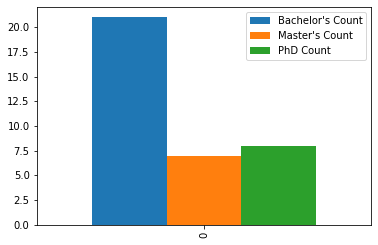

In [191]:
indeed_snippet = indeed_df["snippet"]
count_bachelors = []
count_masters = []
count_phd = []
total_bachelors = []
total_masters = []
total_phd = []

for x in indeed_snippet: 
    txt = x
    count_bachelors.append(re.findall("Bachelor's", txt))
    count_masters.append(re.findall("Master's", txt))
    count_phd.append(re.findall("PhD", txt))
    
for j_bachelors in count_bachelors:
    for k_bachelors in j_bachelors:
        total_bachelors.append(k_bachelors)
        
        
for j_masters in count_masters:
    for k_masters in j_masters:
        total_masters.append(k_masters)
        
for j_phd in count_phd:
    for k_phd in j_phd:
        total_phd.append(k_phd)
        
print(len(total_bachelors))
print(len(total_masters))
print(len(total_phd))
        
bachelors = len(total_bachelors)
masters = len(total_masters)
phd = len(total_phd)


education_df = pd.DataFrame({
    "Bachelor's Count":bachelors,
    "Master's Count":masters,
    "PhD Count":phd

}, index=[0])
education_df.plot(kind='bar', width = 1)

In [181]:
indeed_snippet_df = pd.DataFrame({
    
    "Indeed Snippet": indeed_df["snippet"]
})
indeed_snippet_df.to_csv("snippet.csv")
indeed_snippet_df.head()

,Indeed Snippet
0,Minimum one year of <b>data</b> <b>science</b>...
1,"4+ years of <b>data</b> <b>science</b>, analyt..."
2,The Senior <b>Data</b> <b>Scientist</b> will b...
3,Develop <b>data</b> visualizations to capture ...
4,Continuously analyze <b>data</b> throughout th...
